We are going to apply numerical methods to solve both
eigenvalue and transport problems defined through one-dimensional Schrodinger equation

- (ħ² / 2m) * (d²ψ(x) / dx²) + V(x)ψ(x) = Eψ(x),


where:


m: Mass of the particle.


ħ: Reduced Planck's constant.


E: Energy eigenvalue.


ψ(x): Wavefunction.


V(x): Potential.

In this specific problem, the potential 
𝑉
(
𝑥
)
V(x) is defined as:

V(x) = (ħ² / 2m) * α² * λ * (λ - 1) * [ 1/2 - 1 / cosh²(αx) ],


This problem require an understanding in quantum physics to solve. We will be using Numerov method to find the qigenvalues and eigenfunctions of a potential. Lets solve it step by step:

**Step 1: Import all neccessary library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

**Step 2: Define constants and parameters**

In [2]:
hb = 1  # Planck constant
m = 1     # Particle mass
a = 1 # alpha parameter
lmbda = 4 # lambda parameter

Next, we need to define the potential function V(x). This function describes the potential energy in space as a function of position x.

**Step 3: Define the Potential Function**

In [3]:
def V(x):
    coeff = (hb**2 / (2 * m)) * a**2 * lmbda * (lmbda - 1)
    return coeff * (0.5 - 1 / (np.cosh(a * x)**2))

**Step 4: Numerov Method**

Then, we use the Numerov method to solve the Schrodinger Equation numerically. This method is a second-order finite difference technique used to integrate the wavefunction psi(x) for a given energy E. 

The psi0 and psi1 are initial conditions for the wavefunction, and h is the step size for the x grid.

In [4]:
def numerov(psi0, psi1, E, x, h):
    N = len(x)
    psi = np.zeros(N)
    psi[0], psi[1] = psi0, psi1

    f = lambda xi: 2 * m / hb**2 * (E - V(xi))

    for i in range(1, N - 1):
        k0 = f(x[i - 1])
        k1 = f(x[i])
        k2 = f(x[i + 1])
        psi[i + 1] = (2 * (1 - 5 * h**2 * k1 / 12) * psi[i] - 
                      (1 + h**2 * k0 / 12) * psi[i - 1]) / (1 + h**2 * k2 / 12)

    return psi

The wavefunction is updated iteratively based on the potential V(x) and the energy E.

The function f(xi) represents the local energy difference and is used in the Numerov formula to update psi[i+1].


**Step 5: Define Matching Condition**

The matching condition ensures that the wavefunction is continuous at the turning point.

The solution is calculated for both the left and right parts of the wavefunction (psi_l and psi_r).

The matching condition computes the ratio of the wavefunction’s derivative at the midpoint, ensuring that the wavefunction is smooth across the turning point.

In [5]:
def matching_condition(E, x, h):
    N = len(x)
    psi_l = numerov(0.0, 1e-5, E, x, h)
    psi_r = numerov(0.0, 1e-5, E, x[::-1], h)[::-1]
    x_match = N // 2
    ratio_left = (psi_l[x_match + 1] - psi_l[x_match - 1]) / (2 * h * psi_l[x_match])
    ratio_right = (psi_r[x_match + 1] - psi_r[x_match - 1]) / (2 * h * psi_r[x_match])
    return ratio_left - ratio_right

**Step 6: Root finding for eigenvalues**

In [6]:
def find_eigenvalues(x, h, n_levels=3):
    eigenvalues = []
    E_start = [-5, 0, 2]
    E_end = [0, 5, 5]

    for n in range(n_levels):
        energies = np.linspace(E_start[n], E_end[n], 100)
        for i in range(len(energies) - 1):
            E1, E2 = energies[i], energies[i + 1]
            if matching_condition(E1, x, h) * matching_condition(E2, x, h) < 0:
                result = root_scalar(matching_condition, args=(x, h), bracket=[E1, E2], method='brentq')
                eigenvalues.append(result.root)
                break
        
    return eigenvalues

**Step 7: Set up the range and step size for x**

This step sets up the grid for x, which is the spatial range where the wavefunction will be calculated. The range of x is from xmin and xmax, with a step size h of 0.05. 

The grid points are stored in x


In [7]:
xmin, xmax = -10, 10  # Range for x
h = 0.05                # Step size
x = np.arange(xmin, xmax + h, h)

**Step 8: Find the eigenvalues**

In [8]:
n_levels = 3
eigenvalues = find_eigenvalues(x, h, n_levels=n_levels)

The find_eigenvalues function is called to calculate the first three eigenvalues using the grid x and step size h.

**Step 9: Display Results**

In [9]:
print("Numerical Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

Numerical Eigenvalues:
E_0 = -1.500001
E_1 = 0.999998
E_2 = 2.499998


This prints the calculated numerical eigenvalues.

In [10]:
exact_eigenvalues = [(hb**2 / (2 * m)) * a**2 * (lmbda * (lmbda - 1) / 2 - (lmbda - 1 - n)**2) for n in range(n_levels)]
print("\nExact Eigenvalues:")
for i, E in enumerate(exact_eigenvalues):
    print(f"E_{i} = {E:.6f}")


Exact Eigenvalues:
E_0 = -1.500000
E_1 = 1.000000
E_2 = 2.500000


This calculates and prints the exact eigenvalues for comparison, using a formula based on the parameters defined earlier

**Step 10: Plot Potential and Wavefunctions**

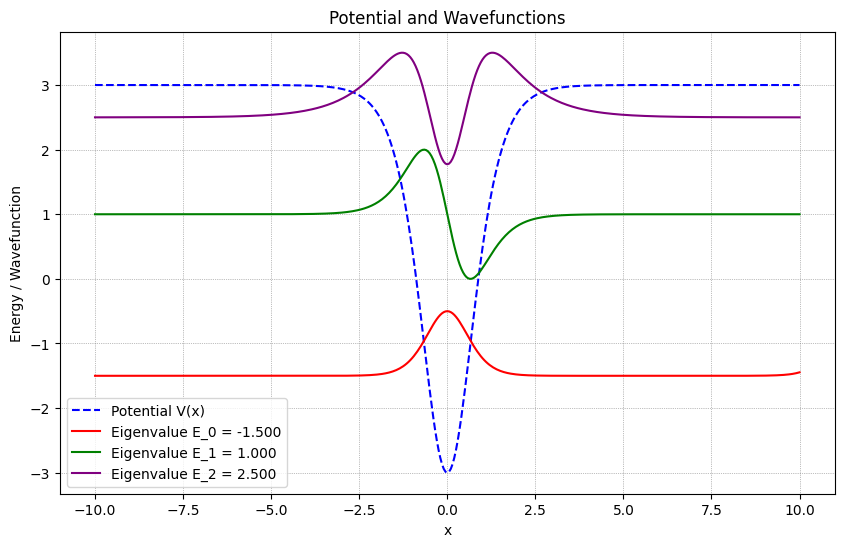

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, V(x), label="Potential V(x)", color='blue', linestyle='--')

colors = ['red', 'green', 'purple']  # Colors for wavefunctions
for i, E in enumerate(eigenvalues):
    psi = numerov(0.0, 1e-5, E, x, h)
    plt.plot(x, psi / np.max(np.abs(psi)) + E, label=f"Eigenvalue E_{i} = {E:.3f}", color=colors[i])

plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.title("Potential and Wavefunctions")
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()


This help in visualizes the potential and the wavefunctions for the calculated eigenvalues.

In conclusion, the problem demonstrates how numerical methods like the Numerov method can be effectively used to solve quantum mechanical problems, providing both accurate results and valuable visual insights into the behavior of a particle in a potential well. The numerical eigenvalues closely match the exact solutions, confirming the method's reliability for similar quantum systems